In [1]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tomli
from sklearn import metrics

In [2]:
with open("src/config.toml", "rb") as f:
    config = tomli.load(f)

1. 数据读取(Data loading)

In [ ]:
df = pd.read_pickle(config["SeqP450Data"]["encoded_path"] + "5foldsdata.pkl")

df1know = df[df["Binding"] == 1]["scores"]
df1unknow = df[df["Binding"] == 0]["scores"]
# 数据保存
# Data saving
df.to_csv(config["SeqP450Data"]["output_path"] + "5foldsdata.csv")

2. 交叉对接与匹配对接打分分布(Score distribution of cross-docking and matched docking)

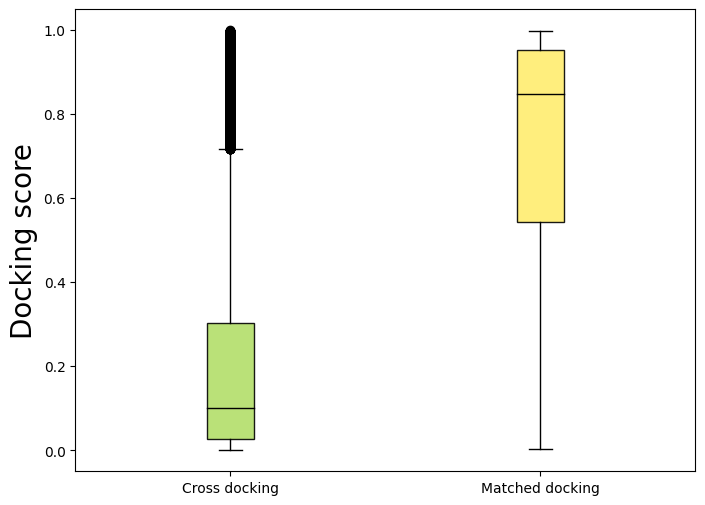

In [4]:
plt.figure(figsize=(8, 6))
cmap = cm.Set3
box = plt.boxplot([df1unknow, df1know], patch_artist=True)

for i, patch in enumerate(box["boxes"]):
    patch.set_facecolor(cmap((i + 1) / (2)))
    patch.set_alpha(0.9)

for median in box["medians"]:
    median.set_color("black")
plt.ylabel("Docking score", fontsize=20)
plt.xticks([1, 2], ["Cross docking", "Matched docking"])
plt.show()

3. 已知反应排名百分占比(Rank percentile of known reactions )

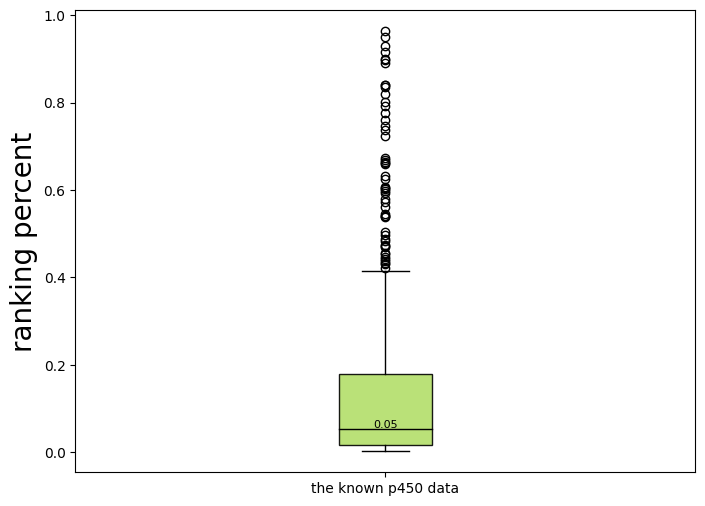

In [ ]:
df1ranking = df[df["Binding"] == 1]["ranking"] / df["ranking"].max()

plt.figure(figsize=(8, 6))
cmap = cm.Set3
box = plt.boxplot(df1ranking, patch_artist=True)

for i, patch in enumerate(box["boxes"]):
    patch.set_facecolor(cmap((i + 1) / (2)))
    patch.set_alpha(0.9)


median = np.median(df1ranking)
plt.text(1, median, f"{median:.2f}", ha="center", va="bottom", fontsize=8)


for median in box["medians"]:
    median.set_color("black")
plt.ylabel("ranking percent", fontsize=20)
plt.xticks([1], ["the known p450 data"])
plt.show()

np.median(df1ranking)
df[["enzyme", "substrate", "Binding", "scores", "ranking"]].to_csv(
    config["SeqP450Data"]["output_path"] + "5foldsdata_little.csv"
)

4. Roc曲线绘制(Plot ROC curve)

In [ ]:
notrain_y_test_pred = np.load(
    config["espData"]["encoded_path"] + "notrain_y_test_pred.npy"
)
notrain_y_test = np.load(config["espData"]["encoded_path"] + "notrain_y_test.npy")

train0_y_test_pred = np.load(
    config["SeqP450Data"]["encoded_path"] + "train0_y_test_pred.npy"
)
train0_y_test = np.load(config["SeqP450Data"]["encoded_path"] + "train0_y_test.npy")
train1_y_test_pred = np.load(
    config["SeqP450Data"]["encoded_path"] + "train1_y_test_pred.npy"
)
train1_y_test = np.load(config["SeqP450Data"]["encoded_path"] + "train1_y_test.npy")
train2_y_test_pred = np.load(
    config["SeqP450Data"]["encoded_path"] + "train2_y_test_pred.npy"
)
train2_y_test = np.load(config["SeqP450Data"]["encoded_path"] + "train2_y_test.npy")
train3_y_test_pred = np.load(
    config["SeqP450Data"]["encoded_path"] + "train3_y_test_pred.npy"
)
train3_y_test = np.load(config["SeqP450Data"]["encoded_path"] + "train3_y_test.npy")
train4_y_test_pred = np.load(
    config["SeqP450Data"]["encoded_path"] + "train4_y_test_pred.npy"
)
train4_y_test = np.load(config["SeqP450Data"]["encoded_path"] + "train4_y_test.npy")


traincombined_y_test_pred = np.concatenate(
    [
        train0_y_test_pred,
        train1_y_test_pred,
        train2_y_test_pred,
        train3_y_test_pred,
        train4_y_test_pred,
    ],
    axis=0,
)
traincombined_y_test = np.concatenate(
    [train0_y_test, train1_y_test, train2_y_test, train3_y_test, train4_y_test], axis=0
)

In [7]:
fpr_notrain, tpr_notrain, threshold = metrics.roc_curve(
    notrain_y_test, notrain_y_test_pred
)
roc_auc_notrain = metrics.auc(fpr_notrain, tpr_notrain)

fpr_train, tpr_train, threshold = metrics.roc_curve(
    traincombined_y_test, traincombined_y_test_pred
)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

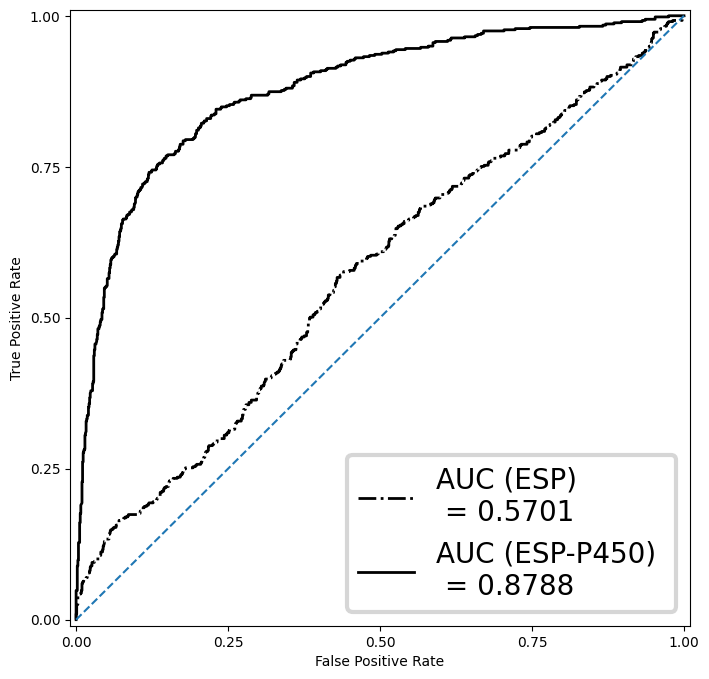

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.rcParams.update({"font.size": 28})


plt.plot(
    fpr_notrain,
    tpr_notrain,
    "black",
    linestyle="-.",
    label="AUC (ESP) \n = %0.4f" % roc_auc_notrain,
    linewidth=2.0,
)
plt.plot(
    fpr_train,
    tpr_train,
    "black",
    label="AUC (ESP-P450) \n = %0.4f" % roc_auc_train,
    linewidth=2.0,
)

ax.locator_params(axis="y", nbins=5)
ax.locator_params(axis="x", nbins=5)

leg = plt.legend(loc="lower right", fontsize=20, frameon=True)
leg.get_frame().set_linewidth(3.0)
plt.plot([0, 1], [0, 1], "--")
eps = 0.01
plt.xlim([0 - eps, 1 + eps])
plt.ylim([0 - eps, 1 + eps])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()